<p style="font-size: 35px">
    <b>EDA. Part II: Black Magic and Its Exposure</b>
    <p style="font-size: 18px">
        <img align="right" width="300" height="150" src="https://www.kaggle.com/competitions/50160/images/header">
        <b>Home Credit - Credit Risk Model Stability</b></p>
        Create a model measured against feature stability over time
</p>

# Survey plan

This is the second part of EDA (the first part is [here](https://www.kaggle.com/code/pib73nl/home-credit-2024-eda-part-i)), where we will continue our research, and even do some calculations. What will we try to understand and what will we try to do based on this understanding:

 1. How to deal with `num_group*` features?
 2. How to deal with custom types? How to deal with types automatically assigned when importing tables?
 3. Selecting aggregation approaches (functions, grouping)
 4. Prepare a dataset using the approaches defined in steps 1-3 and check the result using the [starter notebook](https://www.kaggle.com/code/jetakow/home-credit-2024-starter-notebook)
 
Survey boundaries:
 1. Tables with `depth=1`
 2. We will not consider the practical meaning of individual features and select individual aggregation functions for them. There will be only a general approach here

In [1]:
! pip install /kaggle/input/install-pack-homecredit/hvplot-0.9.2-py2.py3-none-any.whl --no-deps

Processing /kaggle/input/install-pack-homecredit/hvplot-0.9.2-py2.py3-none-any.whl


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
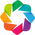

In [2]:
import polars as pl
import polars.selectors as cs
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import os
from os.path import getsize, join, split, splitext
from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from bokeh.models import NumeralTickFormatter
from bokeh.models import HoverTool
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import panel as pn
from ipywidgets import widgets
pn.extension()
plt.style.use('seaborn-v0_8')
pl.Config(
    fmt_str_lengths=80,
    tbl_rows=80,
    set_thousands_separator=' ',
    float_precision=3,
    set_fmt_float="full",
    tbl_cell_alignment = "LEFT",
    tbl_cell_numeric_alignment="RIGHT"
)
frmt_big_numb = NumeralTickFormatter(format='0.0a')

In [3]:
MAIN_PATH = '/kaggle/input/home-credit-credit-risk-model-stability'
TRAIN_PATH_PARQUET = MAIN_PATH + '/parquet_files/train'
TEST_PATH_PARQUET = MAIN_PATH + '/parquet_files/test'
TRAIN_PATH_CSV = MAIN_PATH + '/csv_files/train'
TEST_PATH_CSV = MAIN_PATH + '/csv_files/test'

# General review

In [4]:
path_list = [path for path in glob(f'{TRAIN_PATH_PARQUET}/*.parquet') if 'train_base.parquet' not in path]

In [5]:
def file_list(path_list, depth, take_id=False):
    """
    Preparing list of files and groups of files (if file splited into several parts)
    
    path_list - list of file paths
    depth     - 'depth' in terms of the competition
    take_id   - if you need to take only the identifier of files/groups (not the path)
    """
    files = []
    groups = []
    
    for name in path_list:
        
        name = splitext(split(name)[-1])[0] if take_id else splitext(name)[0]
        splited_name = name.split('_')
        
        # “depth” in file names is in the last (single file case) 
        # or penultimate place (if file splitted into several parts)
        if splited_name[-2].isnumeric():
            if  int(splited_name[-2]) == depth:
                files.append(name)
                groups.append("_".join(splited_name[:-1]))
        else:
            if int(splited_name[-1]) == depth:
                files.append(name)
                groups.append(name)
        
        # let's make a dictionary too, it will come in handy
        struct_dict = {}
        for group in set(groups):
            struct_dict[group] = [file for file in files if group in file]
            
    return files, set(groups), struct_dict

In [6]:
files, groups, struct_dict = file_list(path_list, 1)

## Amount of information

First, let's understand what we are dealing with: how many tables, and how much information is in them

In [7]:
cum_size = 0
for group in sorted(groups):
    size_mb = [getsize(name + ".parquet")/1e6 for name in files if group in name]
    cum_size += sum(size_mb)
    print(f'{group.split("/")[-1]:<25}{sum(size_mb):>10.3f} Mb')
print('='*38, f'{"total":<25}{cum_size:>10.3f} Mb', sep='\n')

train_applprev_1            179.813 Mb
train_credit_bureau_a_1     443.437 Mb
train_credit_bureau_b_1       4.507 Mb
train_debitcard_1             1.188 Mb
train_deposit_1               1.598 Mb
train_other_1                 0.805 Mb
train_person_1               43.892 Mb
train_tax_registry_a_1       21.688 Mb
train_tax_registry_b_1        9.915 Mb
train_tax_registry_c_1       29.825 Mb
total                       736.668 Mb


It's less than 1 GB! Easy-peasy! :)

## How many cases do we have?
How many cases do we have at all - in train_base? And are all cases found in other tables?

In [8]:
base = pl.read_parquet(TRAIN_PATH_PARQUET + '/train_base.parquet') \
         .cast({'case_id':pl.Int64,
                'date_decision':pl.Date,
                'MONTH':pl.UInt32,
                'WEEK_NUM':pl.UInt16,
                'target':pl.UInt8
               })

In [9]:
case_numb = base.shape[0]
print(f'number of unique case_id - {case_numb:,}')
print(f"percentage of positive labels - {base.select(pl.col('target').sum()/pl.col('target').count())[0,0]:.3%}", '\n')
display(base.head())

number of unique case_id - 1,526,659
percentage of positive labels - 3.144% 



case_id,date_decision,MONTH,WEEK_NUM,target
i64,date,u32,u16,u8
0,2019-01-03,201 901,0,0
1,2019-01-03,201 901,0,0
2,2019-01-04,201 901,0,0
3,2019-01-03,201 901,0,0
4,2019-01-04,201 901,0,1


We have **1.5 million unique `case_id`** and a large imbalance of classes (**3% positive labels**).

Now let's find out how many cases there are in each of our tables.

In [10]:
def lazy_df_prep(parts):
    """
    Prepare a LazyFrame from one or more parts (files)
    """
    if len(parts) > 1:
        list_for_concat = [pl.scan_parquet(x+'.parquet') for x in parts]
        df = pl.concat(list_for_concat)
    else:
        df = pl.scan_parquet(parts[0]+'.parquet')
        
    return df

def table_iterator(struct_dict):
    """
    Iterate through a set of tables and return a LazyFrame
    """
    tqdm_iter = tqdm(sorted(struct_dict.keys()), bar_format='{l_bar}{bar}{n_fmt}/{total_fmt} {postfix}')
    
    for group in tqdm_iter:
        tqdm_iter.set_postfix_str(s=group.split("/")[-1])
        df = lazy_df_prep(struct_dict[group])
        
        yield df, group

In [11]:
# let's prepare some stuff for the panel
indic = pn.indicators.Number(
    title_size = '12pt',
    font_size='30pt',
    format = '{value:,}',
    width=230,
    styles={'background':'#2980B9', 
            'text-align':'center',
            'padding':'20px 0 0 0',
            'border-radius': '5px'},
)

indic_dial = pn.indicators.Dial(
    title_size = '10pt',
    tick_size = '6pt',
    format = '{value:,}',
    width=230,
)

In [12]:
grid=[]

for df, group in table_iterator(struct_dict):
    
    numb_uniq = df.select(pl.col('case_id').n_unique()).collect().item() 
    grid.append(indic_dial.clone(value=numb_uniq,
                             name=group.split("/")[-1],
                             bounds=(0, case_numb),
                             colors=[(0.1, 'red'),      # less than one tenth
                                     (0.33, '#F5B7B1'), # more than tenth but less than third
                                     (0.66, 'gold') ,   # more than third but less than two thirds
                                     (0.9, '#A9DFBF'),  # more than two thirds but less than nine tenths 
                                     (1, 'green'),      # more than nine tenths
                                    ],       # next - white
                            )
               )

pn.WidgetBox('### Number of unique cases', 
             pn.GridBox(*grid, styles={'background':'#add8e6'}, ncols=5)
            )

  0%|          0/10 

WidgetBox
    [0] Markdown(str)
    [1] GridBox(ncols=5, styles={'background': '#add8e6'})
        [0] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_applprev_1', tick_size='6pt', title_size='10pt', value=1221522, width=230)
        [1] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_credit_bureau_a_1', tick_size='6pt', title_size='10pt', value=1386273, width=230)
        [2] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_credit_bureau_b_1', tick_size='6pt', title_size='10pt', value=36500, width=230)
        [3] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_debitcard_1', tick_size='6pt', title_size='10pt', value=111772, width=230)
        [4] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_deposit_1', tick_size='6pt', title_size='10pt', value=105111, width=230)
        [5] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_other_1', tick_size='6pt', title_size='10pt', value=51109, width=230)
        [6] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_person_1', tick_size='6pt', title_size='10pt', value=1526659, width=230)
        [7] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_tax_registry_a_1', tick_size='6pt', title_size='10pt', value=457934, width=230)
        [8] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_tax_registry_b_1', tick_size='6pt', title_size='10pt', value=150732, width=230)
        [9] Dial(bounds=(0, 1526659), colors=[(0.1, 'red'), ...], format='{value:,}', name='train_tax_registry_c_1', tick_size='6pt', title_size='10pt', value=482265, width=230)

It's a pity, but **7 out of 10** tables contain **less than a third** of case_id. Come on, it would be a third, **5** tables contain **less than a tenth** of the case_id. There will be too many nulls in our train tables...

## What is num_group?! 
<p style="font-size: 18px"> That is the question! And not only for me... </p>

 - [What is num_group feature?](https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability/discussion/475373)

 - [What is the meaning of num_group1 and num_group2 in depth1 and 2 dataset?](https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability/discussion/476763)

From the explanations of the competition organizers, we know that this is some kind of index for set of records when the relationship between the base_table and another is not one-to-one. There is an example of how this works for personal data, when 0 is the data of the person who applied for the loan, and the other indexes are the data of the people specified in the application. In this case, `num_group1` has an obvious meaning. Will this meaning be revealed to us in other cases? Also in the table with descriptions of the features there are clarifications for some details, but only for the case of `depth = 2`

So, what to do with the `num_group` feature? 
The first thing that comes to mind is to use it as an ordinary ordinal categorical feature. But we group tables by `case_id`, and we will have to somehow aggregate `num_group`. Okay, we can just aggregate... But still, it has a separate meaning, different from other features. The second idea is to expand the features in a pivot table by columns. But this will be very cumbersome, and in the columns, as the value of `num_group` increases, there will be an increasing number of nulls.

Where it makes sense, let's use a special case of a pivot table - *filtering*, where we select a specific `num_group` value and process it separately. The remaining values are also processed separately, and then the columns are joined. For an example of this approach, see below, where we process the `train_person_1` table. There we separately process the data of the borrower (`num_group1=0`), and separately the data of other persons from the application (`num_group1>0`). In the part where we aggregate data about other persons from the application, we use the *max* aggregation function to `num_group` to save data about the number of this "*other persons*". Where it makes no sense to resort to such tricks, we simply aggregate `num_group`.

Let's start with a little statistical research, and evaluate how many unique values the `num_group1` feature has

In [13]:
grid=[]
# green<30, 30<yelow<100, red>100
for df, group in table_iterator(struct_dict):
    
    numb_uniq = df.select(pl.col('num_group1').n_unique()).collect().item() 
    grid.append(indic.clone(value=numb_uniq, 
                             name=group.split("/")[-1],
                             colors=[(30, '#A9DFBF'), (100, '#F9E79F'), (np.inf, '#F5B7B1')],
                            )
               )

pn.WidgetBox('### Number of unique values of the num_group1 feature', 
             pn.GridBox(*grid, styles={'background':'#add8e6'}, ncols=5)
            )

  0%|          0/10 

WidgetBox
    [0] Markdown(str)
    [1] GridBox(ncols=5, styles={'background': '#add8e6'})
        [0] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_applprev_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=20, width=230)
        [1] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_credit_bureau_a_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=529, width=230)
        [2] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_credit_bureau_b_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=21, width=230)
        [3] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_debitcard_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=66, width=230)
        [4] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_deposit_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=65, width=230)
        [5] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_other_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=1, width=230)
        [6] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_person_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=10, width=230)
        [7] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_tax_registry_a_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=99, width=230)
        [8] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_tax_registry_b_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=101, width=230)
        [9] Number(colors=[(30, '#A9DFBF'), ...], font_size='30pt', format='{value:,}', name='train_tax_registry_c_1', styles={'background': '#2980B9', ...}, title_size='12pt', value=121, width=230)

There are *500+* unique values in `train_credit_bureau_a_1`. This is an *external source* and obviously aggregates information from different banks, so it contains more information on different `case_id` than, for example, `train_applprev_1`, which is an *internal source* and stores information about previous applications in HomeCredit. As we will see below, generally the number of records for one `case_id` does not exceed 20, but there are also serial borrowers. Also in external sources about taxes there are many entries for some `case_id`, which is also understandable. It is also remarkable that the `num_group1` in the table `train_other_1` has only one unique value! 

Now let's estimate the distribution of `num_group1` at the `case_id` level. Some tables have a large set of unique `num_group1` values, how often do they occur at the `case_id` level?

In [14]:
# prepare dict of dataframes
num_gr_per_id = {}

for df, group in table_iterator(struct_dict):

    # number of unuque values per case_id
    num_gr_per_id[group.split("/")[-1]] = df.group_by('case_id').agg(pl.col('num_group1').n_unique()).collect()

  0%|          0/10 

In [15]:
# plotting...
for i, name in enumerate(sorted(num_gr_per_id.keys())):
    df = num_gr_per_id[name].group_by(pl.col('num_group1').sort()).agg(pl.col('num_group1').count().alias('number'))
    if not i:
        # if there are up to 25 records, it is more convenient to use a bar
        if len(df) < 25:
            plot_grid = df.plot.bar('num_group1', 
                                    'number',
                                    title=name + ' (bar)',
                                    width=400,
                                    shared_axes=False,
                                    line_color=None,
                                    grid=True,
                                    yformatter=frmt_big_numb).opts(active_tools=['pan'])
        # otherwise histogram
        else:
            df = num_gr_per_id[name].select('num_group1')
            plot_grid = df.plot.hist(bins=20,
                                     title=name + ' (hist)',
                                     width=400,
                                     shared_axes=False,
                                     line_color=None,
                                     grid=True,
                                     yformatter=frmt_big_numb).opts(active_tools=['pan'])
    else:
        if len(df) < 25:
            plot_grid += df.plot.bar('num_group1', 
                                     'number',
                                     title=name + ' (bar)',
                                     width=400,
                                     shared_axes=False,
                                     line_color=None,
                                     grid=True,
                                     yformatter=frmt_big_numb).opts(active_tools=['pan'])
        else:
            df = num_gr_per_id[name].select('num_group1')
            plot_grid += df.plot.hist(bins=20,
                                      title=name + ' (hist)',
                                      width=400,
                                      shared_axes=False,
                                      line_color=None,
                                      grid=True,
                                      yformatter=frmt_big_numb).opts(active_tools=['pan'])

display(plot_grid.cols(3))


:Layout
   .Bars.I        :Bars   [num_group1]   (number)
   .Histogram.I   :Histogram   [num_group1]   (num_group1_count)
   .Bars.II       :Bars   [num_group1]   (number)
   .Histogram.II  :Histogram   [num_group1]   (num_group1_count)
   .Histogram.III :Histogram   [num_group1]   (num_group1_count)
   .Bars.III      :Bars   [num_group1]   (number)
   .Bars.IV       :Bars   [num_group1]   (number)
   .Histogram.IV  :Histogram   [num_group1]   (num_group1_count)
   .Histogram.V   :Histogram   [num_group1]   (num_group1_count)
   .Histogram.VI  :Histogram   [num_group1]   (num_group1_count)

In general, we see that where the number of values is in the tens, the first five is most common, and where the number of values is in the hundreds, the first twenty. Stands out against this background "slide with a dead end" - `train_applprev_1`, and "blue square" - `train_other_1`.

In [16]:
# Further we will be based on the assumption that the same case_id cannot occur more than once in a group
# Let's check this assumption
def check_rep_caseid_in_group(df):
    """
    Сheck if case_id can occur several times in num_group
    """
    df = df.group_by('num_group1', 'case_id') \
           .agg((pl.col('case_id').count()).alias('rep_caseid_in_group')) \
           .filter(pl.col('rep_caseid_in_group')>1).collect()

    return df.shape[0]

print('Number of cases when the same case_id occurs several times in a group:')
for df, group in table_iterator(struct_dict):
    print(f' - {group.split("/")[-1]:<25} {check_rep_caseid_in_group(df)} cases')

Number of cases when the same case_id occurs several times in a group:


  0%|          0/10 

 - train_applprev_1          0 cases
 - train_credit_bureau_a_1   0 cases
 - train_credit_bureau_b_1   0 cases
 - train_debitcard_1         0 cases
 - train_deposit_1           0 cases
 - train_other_1             0 cases
 - train_person_1            0 cases
 - train_tax_registry_a_1    0 cases
 - train_tax_registry_b_1    0 cases
 - train_tax_registry_c_1    0 cases


## Types of features

In the [Part I](https://www.kaggle.com/code/pib73nl/home-credit-2024-eda-part-i/#Table-exploring), we already found out that during import, features of type L and T may turn out to be different dtypes. Let's take some useful stuff from [Part I](https://www.kaggle.com/code/pib73nl/home-credit-2024-eda-part-i), and look at what happens with the types of features in our tables.

In [17]:
def aggregate_nulls(path):
    
    id = split(path)[-1]
    feat_def = pl.read_csv(MAIN_PATH + '/feature_definitions.csv')
    
    df = pl.scan_parquet(path+'.parquet')
    df_dtypes = pl.DataFrame({'features':df.columns, 'dtypes':[str(x) for x in df.dtypes]})
    df = df.collect()
    
    df_shapes = pl.DataFrame({'file':id, 'n':df.shape[0], 'm':df.shape[1]}) \
                        .with_columns((pl.col('n')*pl.col('m')).alias('cells_numb'))
    
    df = df.null_count().select(pl.all().exclude(['case_id', 'num_group1', 'num_group2']), 
                                pl.lit(id).alias('file'),
                               )
    
    df_nulls = df.melt('file', variable_name='features', value_name='nulls_numb') \
                 .with_columns(pl.col('features').str.slice(-1).alias('type')) \
                 .join(df_dtypes, on='features', how='left') \
                 .join(feat_def, left_on='features', right_on='Variable', how='left')
    
    return df_nulls, df_shapes

def take_description(feat):
    """
    Splits feature description into several lines of a given length
    """
    maxlen = 70 # max length of feature descriptor line
    # take a feature description
    xlabel = feat_defs.filter(pl.col('Variable') == feat).select('Description').item()[:-1]
    # there are many long feature descriptors, we should split them into several lines
    if len(xlabel) - maxlen > 10: # to avoid hyphenation of one-two letters
        xlabel = ''.join([xlabel[x:x+maxlen]+'\n' for x in range(0, len(xlabel), maxlen)])[:-1]
    return xlabel

In [18]:
# table with feature definitions
feat_defs = pl.read_csv(MAIN_PATH + '/feature_definitions.csv')

In [19]:
for i, path in tqdm(enumerate(files), total=(len(files))):
    
    nulls, shapes = aggregate_nulls(path)
    
    if i==0:
        df_nulls, df_shapes = nulls, shapes
    else:
        df_nulls = df_nulls.vstack(nulls)
        df_shapes = df_shapes.vstack(shapes)
    
del nulls, shapes

# replace file names with group names where necessary.
df_nulls = df_nulls.with_columns(pl.when(pl.col('file').str.split(by="_").list[-2].str.contains(r'[0-9]'))
                                 .then(pl.col('file').str.strip_suffix('_' + pl.col('file').str.split(by='_').list[-1]))
                                 .otherwise(pl.col('file')).alias('file')
                                )
# aggregate by categorical features
df_nulls = df_nulls.group_by(cs.string()).agg(pl.col('nulls_numb').sum())


  0%|          | 0/14 [00:00<?, ?it/s]

In [20]:
# making a pivot table with the number of features by tables, custom types and dtypes
feat_pivot = df_nulls.pivot(index=['file', 'type'], columns='dtypes', values=['dtypes'], aggregate_function='len').fill_null(strategy='zero')
feat_pivot.head()

file,type,String,Float64,Boolean
str,str,u32,u32,u32
"""train_tax_registry_c_1""","""D""",1,0,0
"""train_credit_bureau_a_1""","""M""",11,0,0
"""train_credit_bureau_a_1""","""D""",12,0,0
"""train_credit_bureau_a_1""","""T""",0,8,0
"""train_credit_bureau_a_1""","""A""",0,24,0


In [21]:
# making a lists and dict of a file and groups id (not path) for convenience
files_id, groups_id, struct_dict_id = file_list(path_list, depth=1, take_id=True)

In [22]:
box = []

indic = pn.indicators.Number(
    title_size = '8pt',
    colors=[(np.inf, 'white')],
    font_size='36pt',
    format = '{value:,}',
    styles={'background':'#2980B9', 
            'text-align':'center',
            'padding':'20px 0 0 0',
           },
)

for name in groups_id:
    grid = pn.GridSpec(width=600, height=300)
    table = feat_pivot.filter(file=name)
    by_dtype = table.select(cs.numeric().sum())
    all_types = by_dtype.sum_horizontal().item()
    grid[0, 0] = indic.clone(value=all_types, name=name)
    grid[0:2,1:5] = table.plot.bar(x='type', 
                                   stacked=True,
                                   legend='top_right', 
                                   cmap='Pastel1',
                                  ).opts(toolbar=None, 
                                         active_tools=['pan'],
                                         line_color=None,
                                         labelled=[False,False],
                                        )

    box.append(grid)
    
pn.WidgetBox('### Relation of custom types and dtypes', 
             pn.GridBox(*box, styles={'background':'#a7cae5'}, ncols=2)
            )

WidgetBox
    [0] Markdown(str)
    [1] GridBox(ncols=2, styles={'background': '#a7cae5'})
        [0] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_tax_registry_b_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=3, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [1] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_deposit_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=3, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [2] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_applprev_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=39, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [3] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_credit_bureau_a_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=77, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [4] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_person_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=35, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [5] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_debitcard_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=4, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [6] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_other_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=5, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [7] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_credit_bureau_b_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=43, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [8] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_tax_registry_a_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=3, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)
        [9] GridSpec(height=300, ncols=5, nrows=2, sizing_mode='fixed', width=600)
            [0] Number(colors=[(inf, 'white')], font_size='36pt', format='{value:,}', height=150, name='train_tax_registry_c_1', styles={'background': '#2980B9', ...}, title_size='8pt', value=3, width=120)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=480)

To cover the maximum number of options, consider the following tables:
 1. `train_applprev_1` (small number of unique `num_group1` values; individual distribution of `num_group1` values; presence of a custom type converted to several dtypes)
 2. `train_person_1` (we know how to interpret the `num_group1` attribute here, and we will try to extract something useful from it)
 3. `train_credit_bureau_a_1` (this table has the largest size, both in megabytes - *443*, and in terms of the number of features - *77*, and it has the largest number of unique `num_group` values - *529*! Among other things, it is interesting to understand whether there will be problems with RAM when processing such a large file)

And these tables also cover 80-100% of `case_id` values! Forward!

# Analysis of selected tables

Let's load the selected tables and immediately convert some automatically assigned dtypes

In [23]:
# of course in a "lazy" format, to save memory
applprev_df = lazy_df_prep(struct_dict[f'{TRAIN_PATH_PARQUET}/train_applprev_1'])
person_df = lazy_df_prep(struct_dict[f'{TRAIN_PATH_PARQUET}/train_person_1'])
credit_bureau_a_df = lazy_df_prep(struct_dict[f'{TRAIN_PATH_PARQUET}/train_credit_bureau_a_1'])

In [24]:
def gen_conv_types(df, date_to_physical=True):
    """
    General features conversion
    """
    
    # the features of custom type "D" are imported as strings, let's give them the correct type - date
    date_columns = [name for name in df.columns if name[-1]=='D']
    if date_columns:
        df = df.with_columns(pl.col(date_columns).cast(pl.Date, strict=False))
        
        # ...and immediately change the date to a number (if you want)
        if date_to_physical:
            df = df.with_columns(cs.temporal().to_physical())
    
    # shrink numeric columns to minimum available dtype
    # commented out due to problems merging tables
    #df = df.with_columns(cs.numeric().shrink_dtype()) 

    return df

In [25]:
# converting types
person_df_conv = gen_conv_types(person_df, date_to_physical=True)
applprev_df_conv = gen_conv_types(applprev_df, date_to_physical=True)
credit_bureau_a_df_conv = gen_conv_types(credit_bureau_a_df, date_to_physical=True)

### Along comes a 4D analysis of fullness :)

In [26]:
def make_df_with_fullness(df):
    """
    Creates a table containing the percentage of fullness in features by group
    """
    # calculation of percentage of not null values by num_group1 for each feature
    df_1 = df.group_by('num_group1').agg(
            (pl.all().exclude(['case_id', 'num_group1', 'num_group2']).count()
             .truediv(pl.col('num_group1').count())
            )*100
        ).melt(id_vars='num_group1', variable_name='feature', value_name='prc_full_in_group')
    
    # given that case_id can only occur once in num_group (we've already checked it above), 
    # dividing by case_numb gives the number of not null cases in the group
    df_2 = df.group_by('num_group1').agg(
            (pl.all().exclude(['case_id', 'num_group1', 'num_group2']).count()
             .truediv(case_numb)
            )*100
        ).melt(id_vars='num_group1', variable_name='feature', value_name='prc_cases_in_group')
    
    # joining result
    df = df_1.join(df_2, on=['num_group1', 'feature'])
    
    return df

def nulls_by_feat_n_gr(df, height=600, width=1200, rot=60, scale=2, tab_desc=True):
    """
    Visualisation of the percentage of nulls for each num_group and feature 
    """
    # number of unuque values of num_group1 feature
    num_group = df.select(pl.col('num_group1').unique()).collect().to_numpy().squeeze()
    
    df = make_df_with_fullness(df).collect(streaming=True)
    
    # some stuff for beauty
    tooltips = [('Feature', '@feature'),
                ('Group', '@num_group1'), 
                ('Cases in group', '@prc_cases_in_group%'), 
                ('Non-null in group', '@prc_full_in_group%')]
    
    hover = HoverTool(tooltips=tooltips)
    
    scatter = (df.plot.scatter(x='feature', 
                               y='num_group1', 
                               s='prc_full_in_group', 
                               yticks=num_group,  
                               scale=scale, 
                               rot=rot,
                               grid=True, 
                               height=height, width=width, 
                               color='prc_cases_in_group', cmap='tab10',
                              ).opts(labelled=[False], 
                                     active_tools=['pan'],
                                     tools=[hover],
                                    )
               )
    # if you want you may get a table of features description for the same price
    if tab_desc:
        table = df.select(pl.col('feature').unique(maintain_order=True)).join(feat_defs, left_on='feature', right_on='Variable') \
                .plot.table(columns=['feature', 'Description'], width=width, fit_columns=True, editable=True)
        display((scatter+table).cols(1))
    else:
        display(scatter)
        

 **First two**: The names of features and `num_group` values are located along the axes.

 **Third**: The size of the circles shows how many values are not nulls. The larger the circle size, the more `case_id-num_group` combinations are not null. For example, for num_group=1 we have 100 rows. Some features (columns) are filled in completely - they have the largest circle, some have nulls - their circles decrease in proportion to the number of nulls. If there is no circle at all, then this feature has no non-null values at all in this group. Fine! But the size of the circle says nothing about how many of the one and a half million possible case_ids there are for a given group. We need a fourth dimension!

 **Forth**: The color of the circles shows how many `case_id` values there are for a given attribute and group number. For example, for num_group=9 we have 10 rows and all are non-zero. The circle will be as large as possible. But we have one and a half million cases, and there are only 10 rows here! Such a case will be displayed in blue.

Let's start with something simple - `train_person_1`. The picture is in full view! 

We see features that are practically not filled out (birthdate_87D, childnum_185L, gender_992L,housingtype_772L etc.). 

Some features are completed only for the borrower (birth_259D, incometype_1044T etc.), some only for additional persons in the application (relationshiptoclient_415T, remitter_829L etc.). This reflects the specific meaning of the `num_group1` feature for tables with personal data.

There are a dozen features that do not have nulls in any group. Basically these are features of type M. But the colors indicate that not all is well with them either, because starting from the first group, the coverage of cases decreases to 50%, and starting from the fourth, it drops to 10%. From an applied point of view, this means that there are simply different numbers of additional persons in loan applications.

Feel free to see something of your own in this picture...

In [27]:
nulls_by_feat_n_gr(person_df_conv)

:Layout
   .Scatter.I :Scatter   [feature]   (num_group1,prc_cases_in_group,prc_full_in_group)
   .Table.I   :Table   [feature,Description]

As stated above, table `train_applprev_1_*` does not include all cases (about 80%). Therefore, the color scale does not reach 100%. Starting from group 12, coverage drops below 10% of cases. In general, based on the source for this diagram, you can build a feature selection algorithm

In [28]:
nulls_by_feat_n_gr(applprev_df_conv, height=700)

:Layout
   .Scatter.I :Scatter   [feature]   (num_group1,prc_cases_in_group,prc_full_in_group)
   .Table.I   :Table   [feature,Description]

Even in the [Part I](https://www.kaggle.com/code/pib73nl/home-credit-2024-eda-part-i) it was clear that table `train_credit_bureau_a_1_*` contains the largest number of zeros. Therefore, here we also see many small dots *(note the different scale - here it is slightly smaller than in the diagram above)*. I didn’t dare display this table in its entirety (only 50 out of 500 groups) - it wouldn’t be very clear, and it wouldn’t fit into memory. You can try to display iteratively in 50 groups, but I don’t promise you anything interesting there :), since already from the 16th group the number of cases drops to 10%, and by the 50th it drops to 0.2%

In [29]:
nulls_by_feat_n_gr(credit_bureau_a_df_conv.filter(pl.col('num_group1')<50), height=1200, width=1500, rot=90, scale=1)
# nulls_by_feat_n_gr(credit_bureau_a_df_conv.filter(pl.col('num_group1').is_between(50,100)), height=1200, width=1500, rot=90, scale=1)

:Layout
   .Scatter.I :Scatter   [feature]   (num_group1,prc_cases_in_group,prc_full_in_group)
   .Table.I   :Table   [feature,Description]

## Table - train_person_1

When considering the table, we will act according to the following algorithm:
 - decide how to deal with `num_group`
 - divide the features into numeric, string and logical (work with them separately)
   - **numeric**: filter out invariants and use quantile transformation
   - **string**: when we have a one-to-one relationship between `case_id` and some feature, we can simply cast it to a categorical type and rely on the internal tool of the model (if this is, for example, some kind of boosting). But for tables with *groups*, we first need to somehow aggregate the features, including categorical ones. Let's try using a custom transformer
   - **logical**: throw out the invariants, leave the rest as is
 - join the resulting tables and admire the result!

Let's start with `person_df`. We alredy know that data with `num_group1=0` is borrower data. When `num_group1>0` this is the data of additional persons in the application. 

We noticed above that some features are filled out only for the borrower, and some only for additional persons in the application. So I will process them separately. For most features, data on borrowers is available for all `case_id`. Let's filter out those that are more than 90% full. There can be up to 9 additional persons in the application. It is possible that these are different applications, since we also have a table with previous applications. In any case, we need to somehow aggregate the data where `num_group1>0` by `case_id`. Expanding them into several columns (pivot) will be cumbersome, since the number of `case_id` drops quickly with increasing `num_group` value (see the diagram above). Apparently we will aggregate within each column (sum, average, maximum, minimum - depending on the situation).

### Selection of features and separation by data types (`num_group=0`)

In [30]:
# create a table containing the percentage of fullness in features by group 
sel_feat_df = make_df_with_fullness(person_df_conv).collect()
# these are features for group=0
features = sel_feat_df.filter((pl.col('num_group1')==0) & (pl.col('prc_full_in_group')>90)).select('feature').to_numpy().squeeze()

In [31]:
def features_selector(df, features, dtype_selector):
    """
    Selects the intersection of the passed list of features and the passed type
    """
    return df.select('case_id', 'num_group1', *features).select('case_id', 'num_group1', dtype_selector)

In [32]:
# sepatation by dtypes
person_df_num = features_selector(person_df_conv, features, (cs.numeric()-cs.matches('case_id|num_group1'))).filter(pl.col('num_group1')==0)
person_df_bool = features_selector(person_df_conv, features, cs.boolean()).filter(pl.col('num_group1')==0)
person_df_str = features_selector(person_df_conv, features, cs.string()).filter(pl.col('num_group1')==0)

### Deal with numeric features

In [33]:
# what have we already got?
person_df_num.collect().describe()

statistic,case_id,num_group1,birth_259D,mainoccupationinc_384A,personindex_1023L,persontype_1072L,persontype_792L
str,f64,f64,f64,f64,f64,f64,f64
"""count""",1 526 659.000,1 526 659.000,1 526 659.000,1 526 659.000,1 526 659.000,1 526 659.000,1 526 659.000
"""null_count""",0.000,0.000,0.000,0.000,0.000,0.000,0.000
"""mean""",1 286 076.572,0.000,1 909.037,57 707.483,0.000,1.000,1.000
"""std""",718 946.592,0.000,5 113.432,33 348.303,0.000,0.000,0.000
"""min""",0.000,0.000,-9 803.000,0.000,0.000,1.000,1.000
"""25%""",766 198.000,0.000,-2 345.000,36 000.000,0.000,1.000,1.000
"""50%""",1 357 358.000,0.000,2 557.000,50 000.000,0.000,1.000,1.000
"""75%""",1 739 023.000,0.000,6 209.000,70 000.000,0.000,1.000,1.000
"""max""",2 703 454.000,0.000,10 865.000,200 000.000,0.000,1.000,1.000


In addition to `num_group1`, the features `personindex*` and `persontype*` are clearly unnecessary here, because they have no variability. 

In [34]:
# exclude invariants
features = person_df_num.std().melt().filter(pl.col('value')==0).select('variable').collect().to_numpy().squeeze()
person_df_num = person_df_num.select(pl.all().exclude(*features))
person_df_num.collect().head()

case_id,birth_259D,mainoccupationinc_384A
i64,i32,f64
0,6 025,10 800.000
1,-4 536,10 000.000
2,1 795,14 000.000
3,8 613,10 000.000
4,8 766,24 000.000


To normalize the remaining features, we use [quantile transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html), it handles outliers well.

In [35]:
def quant_transf(df, exclude=['case_id', 'num_group1', 'num_group2']):
    """
    Apply Quantile Transformer to all columns of a dataframe except those excluded
    """
    
    keys = [key for key in df.columns if key in exclude]
    vals = [key for key in df.columns if key not in exclude]
    
    rng = np.random.RandomState(42)
    qt = QuantileTransformer(output_distribution='normal', random_state=rng)
    
    vals_np = qt.fit_transform(df.select(vals).collect())
    
    df = df.select(keys).collect().hstack(pl.DataFrame(vals_np, schema=vals))
    
    return df.lazy()

# let's also get some staff from Part I for beautiful visualisation
def subplot_format(feat_list):
    """
    Sets the number of columns and their height and width on a plot figure
    (these settings are specific to my monitor)
    """
    len_feat_list = len(feat_list)
    if len_feat_list == 1:
        cols = 1
        width = 1000
        height = 300
    elif len_feat_list < 7:
        cols = 2
        width = 600
        height = 300
    else: 
        cols = 3
        width = 400
        height = 250
    return cols, width, height

def plot_violin(df, feat_list, **ext_plot_options):
    """
    Plots histogramms for non-categorical fratures
    """
    df = df.collect()
    cols, width, height = subplot_format(feat_list)
    
    for i, feat in enumerate(feat_list):
        
        xlabel = take_description(feat)
        
        if not i:
            grid = df.plot.violin(feat, 
                                 width=width, 
                                 height=height,
                                 title=feat,
                                 xlabel = xlabel,
                                 fontsize={'xlabel':8},
                                 violin_line_color=None,
                                 **ext_plot_options,
                                ).opts(active_tools=['pan']).sort()
        else:
            grid += df.plot.violin(feat, 
                                 width=width, 
                                 height=height,
                                 title=feat,
                                 xlabel = xlabel,
                                 fontsize={'xlabel':8},
                                 violin_line_color=None,
                                 **ext_plot_options,
                                ).opts(active_tools=['pan']).sort()
    return grid

In [36]:
# data before transformation
befor = plot_violin(person_df_num, 
                    [name for name in person_df_num.columns if name not in ['case_id', 'num_group1']], 
                    yformatter=frmt_big_numb, 
                    shared_axes=False).cols(1)

# data after transformation
person_df_num_q = person_df_num.pipe(quant_transf)
after = plot_violin(person_df_num_q,
                    [name for name in person_df_num_q.columns if name not in ['case_id', 'num_group1']],
                    yformatter=frmt_big_numb,
                    shared_axes=False).cols(1)

styles = {
    'background-color':'#F6F6F6', 'width':'100%',
    'font-size':'24px', 'font-weight':'400', 'text_align':'center'
}

grid = pn.GridSpec(width=1200, height=800)
grid[:, 0] = pn.Column(pn.pane.HTML('Befor', styles=styles), befor)
grid[:, 1] = pn.Column(pn.pane.HTML('After', styles=styles), after)

display(grid)

GridSpec(height=800, ncols=2, nrows=1, sizing_mode='fixed', width=1200)
    [0] Column(height=800, width=600)
        [0] HTML(str, styles={'background-color': '#F6F...})
        [1] HoloViews(Layout)
    [1] Column(height=800, width=600)
        [0] HTML(str, styles={'background-color': '#F6F...})
        [1] HoloViews(Layout)

There is a difference, isn't there? Hope this helps :)

### Deal with categorical data

Let's take some stuff from the [Part I](https://www.kaggle.com/code/pib73nl/home-credit-2024-eda-part-i) to visualize the overall picture with categorical features

In [37]:
def numb_rate_of_unique_table(df, feature, width, height, title):
    """
    Create table with the number and percentage of unique values for categorical features
    """
    table = df.select(pl.col(feature), pl.col(feature).count().alias('total')) \
              .group_by([feature, 'total']).len().sort('len', descending=True) \
              .filter(pl.col(feature).is_not_null()) \
              .select(pl.col(feature), pl.col('len'),((pl.col('len')/pl.col('total'))*100).round(2).alias('rate')).collect() \
              .plot.table(width=width, 
                          height=height,
                          title=title,
                          fontsize={'title':8},
                          yformatter=frmt_big_numb)
    return table

def plot_cat_features(df, feat_list):
    """
    Plots data for categorical features
    """
    cols, width, height = subplot_format(feat_list)
    
    # prepare a table for each categorical feature
    for i, feat in enumerate(feat_list):
        desc = take_description(feat)
        if not i:
            grid = numb_rate_of_unique_table(df, feat, width, height, desc)
        else:
            grid += numb_rate_of_unique_table(df, feat, width, height, desc)

    # display a graph of unique values per feature
    display(df.select(pl.col(feat_list).drop_nulls().n_unique()).collect() 
              .plot.barh(width=1000, 
                         xlabel='features', 
                         ylabel='number or unique values',
                         title=f'Number of unique values per categorical feature'
                        )
           )
    # display a tables of unique values with number and rate of each value
    display(grid.cols(cols)) if cols>1 else display(grid)

In [38]:
plot_cat_features(person_df_str, [name for name in person_df_str.columns if name not in ['case_id', 'num_group1']])

:Bars   [index,Variable]   (value)

:Layout
   .Table.I    :Table   [contaddr_district_15M,len,rate]
   .Table.II   :Table   [contaddr_zipcode_807M,len,rate]
   .Table.III  :Table   [education_927M,len,rate]
   .Table.IV   :Table   [empladdr_district_926M,len,rate]
   .Table.V    :Table   [empladdr_zipcode_114M,len,rate]
   .Table.VI   :Table   [incometype_1044T,len,rate]
   .Table.VII  :Table   [language1_981M,len,rate]
   .Table.VIII :Table   [registaddr_district_1083M,len,rate]
   .Table.IX   :Table   [registaddr_zipcode_184M,len,rate]
   .Table.X    :Table   [role_1084L,len,rate]
   .Table.XI   :Table   [sex_738L,len,rate]
   .Table.XII  :Table   [type_25L,len,rate]

Here we see that we have several features with more than 3 thousand unique values (address data). There are also several features with a small number of unique values (within 10). It would be a good idea to consider different options for these cases...

If you are using any boosting models, you may be relying on their internal tools. But in any case, the issue of approach to aggregation of categories by `case_id` will have to be resolved. Now we are considering `num_group1=0`, that is, `case_id` is our primary key, and we do not need category aggregation. But below, when we consider `num_group>0`, we will have to somehow collapse the data from several groups into one `case_id`. If this is inevitable, why don't we take this approach now without delay?

Please also pay attention to the details where one value prevails in all cases. For example, `type_25L`. There will be very little variability here

Here's our approach: first convert features to a number type using a **custom transformer**, and then apply a **quantile transformer** to the result

In [39]:
# custom categorical features transformer
def hash_n_log_transformer(expr):
    """
    Hashing feature -> get a list of uint64 (even if there is single number);
    then summarize -> get uint64 number (huge);
    then logarithmize - get a much smaller number! 
    """
    return expr.hash(42).sum().log()

In [40]:
# let'p put it all together
person_df_str = person_df_str.select(pl.all().exclude('num_group1')) # throw out num_group1 
person_df_str_hl = person_df_str.group_by('case_id').agg(pl.all().exclude('case_id').pipe(hash_n_log_transformer)).pipe(quant_transf)

In [41]:
plot_violin(person_df_str_hl,
            [name for name in person_df_str_hl.columns if name not in ['case_id', 'num_group1']],
            yformatter=frmt_big_numb,
            shared_axes=False).cols(3)

:Layout
   .Violin.I    :Violin   (contaddr_district_15M)
   .Violin.II   :Violin   (contaddr_zipcode_807M)
   .Violin.III  :Violin   (education_927M)
   .Violin.IV   :Violin   (empladdr_district_926M)
   .Violin.V    :Violin   (empladdr_zipcode_114M)
   .Violin.VI   :Violin   (incometype_1044T)
   .Violin.VII  :Violin   (language1_981M)
   .Violin.VIII :Violin   (registaddr_district_1083M)
   .Violin.IX   :Violin   (registaddr_zipcode_184M)
   .Violin.X    :Violin   (role_1084L)
   .Violin.XI   :Violin   (sex_738L)
   .Violin.XII  :Violin   (type_25L)

Fearures with a small number of unique values and low variability are immediately noticeable. Let's leave them as is for now

### Boolean features

In [42]:
plot_cat_features(person_df_bool, [name for name in person_df_bool.columns if name not in ['case_id', 'num_group1']])

:Bars   [index,Variable]   (value)

:Layout
   .Table.I   :Table   [contaddr_matchlist_1032L,len,rate]
   .Table.II  :Table   [contaddr_smempladdr_334L,len,rate]
   .Table.III :Table   [safeguarantyflag_411L,len,rate]

Obviously, these details are useless (of course, when `num_group=0`) - one of them is one hundred percent invariant, and two are almost. 

But this is a special case. We need to solve the problem of how to aggregate boolean features by `case_id`. Taking into account that for each `case_id` there can be a different number of `num_groups`, we will sum up the boolean features and divide by the maximum `num_group1` within each `case_id`

## Tables: train_applprev_1 & train_credit_bureau_a_1

It would be boring to look at two more tables separately, so let's put the drafts together

In [43]:
def exclude_invariants(df, dtype={'numeric', 'string', 'boolean'}, log=True):
    """
    Excludes invariant features
    """
    
    if dtype in ['numeric', 'boolean']:
        # for numeric and boolean features, exclusion is based on standard deviation
        features = df.std().melt().filter(pl.col('value')==0).select('variable').collect().to_numpy().squeeze(axis=1)
    else:
        # for string - on number of unique values
        features = df.select(pl.all().drop_nulls().n_unique()).melt() \
                     .filter(pl.col('value')==1).select('variable').collect().to_numpy().squeeze(axis=1)

    if features.size > 0:
        df = df.select(pl.all().exclude(features))
        if log: print(f'    [Excluded invariant numeric features ({len(features)}): {features}]')
    else:
        if log: print(f'    [There are no invariant {dtype} features]')
            
    return df

def hash_n_str_transformer(expr):
    """
    Hashing feature -> get a list of uint64 (even if there is single number);
    then summarize -> get uint64 number (huge);
    then cast string type - and get the code for our aggregated category! 
    """
    return expr.hash(42).sum().cast(pl.String)

def numeric_features(df, log=True):
    """
    Processes numeric features: excludes invariants, applies quantile transformation
    """
    
    # exclude invariants
    df = exclude_invariants(df, dtype='numeric', log=log)
    numb_feat_proc = len([clmn for clmn in df.columns if clmn not in ['case_id', 'num_group1']])
    
    if log: print(f'    [{numb_feat_proc} features processing...]')
    # apply quantile transform (!! I commented this out later as the LightGBM liked the skewed distribution better !!)
    df = df.group_by('case_id').agg(pl.all().exclude('case_id', 'num_group1').sum())#.pipe(quant_transf)
    
    return df

def string_features(df, log=True):
    """
    Processes string features: excludes invariants, applies custom and quantile transformation
    """
    
    # exclude invariants
    df = exclude_invariants(df, dtype='string', log=log)
    numb_feat_proc = len([clmn for clmn in df.columns if clmn not in ['case_id', 'num_group1']])
    
    if log: print(f'    [{numb_feat_proc} features processing...]')
    # apply custom transform
    df = df.group_by('case_id').agg(pl.all().exclude('case_id').pipe(hash_n_str_transformer))
    
    return df

def boolean_features(df, log=True):
    """
    Processes boolean features: excludes invariants, applies custom aggregation
    """
    
    # exclude invariants
    df = exclude_invariants(df, dtype='boolean', log=log)
    numb_feat_proc = len([clmn for clmn in df.columns if clmn not in ['case_id', 'num_group1']])
    
    if log: print(f'    [{numb_feat_proc} features processing...]')
    # aggregation
    if 'num_group1' in df.columns:
        # sum up all the boolean features and take the maximum num_group1
        df = df.group_by('case_id').agg(pl.all().exclude('case_id', 'num_group1').sum(), 
                                        pl.col('num_group1').max()
                                       )
        # divide the result of summing the boolean features by max(1, num_group1)
        df = df.with_columns(pl.all().exclude('case_id', 'num_group1') / 
                             pl.max_horizontal(pl.lit(1), pl.col('num_group1'))
                            )
    else:
        # sum up all the boolean features only 
        df = df.group_by('case_id').agg(pl.all().exclude('case_id', 'num_group1').sum())
    
    return df

def features_transform_depth_1(df, rate_fullness = 0.9, log=True):
    """
    Transforming tables of depth=1:
     - feature selection by rate_fullness
     - feature separation by dtypes
     - processing all dtypes separately and joining the results
    """
    if log: print('[Types conversion...]')
    # general features conversion
    df = gen_conv_types(df, date_to_physical=True)
    
    if log: print('[Features selection...]')
    numb_feat_start = len([clmn for clmn in df.columns if clmn not in ['case_id', 'num_group1']])
    # create a table containing the rate of fullness by features
    sel_feat_df = df.select(pl.all().exclude(['case_id', 'num_group1', 'num_group2']).count()
                            .truediv(pl.col('num_group1').count())
                           ).melt()
    
    # these are features with a given fullness
    features = sel_feat_df.filter(pl.col('value') > rate_fullness).select('variable').collect().to_numpy().squeeze()
    numb_feat_end = len([clmn for clmn in features if clmn not in ['case_id', 'num_group1']])
    if log: print(f'  [{numb_feat_start - len(features)} of {numb_feat_start} features were excluded because they contained more than {rate_fullness:.0%} nulls]')
    
    if log: print('[Features separation...]')
    # select features by dtypes and fullness
    df_num = features_selector(df, features, (cs.numeric()-cs.matches('case_id|num_group1')))
    df_str = features_selector(df, features, cs.string())
    df_bool = features_selector(df, features, cs.boolean())
    
    if log: print('[Features processing...]')
    
    # features processing
    #numeric
    if log: print('  [Numeric...]')
    num_avail = False
    if len(df_num.columns) > 2: # not only 'case_id' and 'num_group1'
        df = numeric_features(df_num, log=log).drop('num_group1')
        num_avail = True # are there numeric features?
    else:
        if log: print('    [There are no numeric features]')
    
    # string
    if log: print('  [String...]')
    str_avail = False
    if len(df_str.columns) > 2:
        str_avail = True
        if num_avail:
            df = df.join(string_features(df_str, log=log).drop('num_group1'), on='case_id', how='outer_coalesce')
        else:
            df = string_features(df_str, log=log).drop('num_group1')
    else:
        if log: print('    [There are no string features]')
    
    #boolean
    if log: print('  [Boolean...]')
    if len(df_bool.columns) > 2:
        if num_avail or str_avail:
            df = df.join(boolean_features(df_bool, log=log), on='case_id', how='outer_coalesce')
        else:
            df = boolean_features(df_bool, log=log)
    else:
        if log: print('    [There are no boolean features]')
    
    return df

Next, we simply prepare several datasets and join everything into one

In [44]:
%%time
# feel free to change rate_fullness
# I started with a coefficient of 0.9 and gradually reduced it, which improved the result, even though I don’t process nulls in any way
rate_fullness=0.6
applprev_df_transf = features_transform_depth_1(applprev_df, rate_fullness=rate_fullness)

[Types conversion...]
[Features selection...]
  [15 of 39 features were excluded because they contained more than 60% nulls]
[Features separation...]
[Features processing...]
  [Numeric...]
    [There are no invariant numeric features]
    [12 features processing...]
  [String...]
    [There are no invariant string features]
    [11 features processing...]
  [Boolean...]
    [There are no invariant boolean features]
    [1 features processing...]
CPU times: user 35.5 s, sys: 12.1 s, total: 47.6 s
Wall time: 15 s


In [45]:
%%time
credit_bureau_a_df_transf = features_transform_depth_1(credit_bureau_a_df, rate_fullness=rate_fullness)

[Types conversion...]
[Features selection...]
  [65 of 77 features were excluded because they contained more than 60% nulls]
[Features separation...]
[Features processing...]
  [Numeric...]
    [There are no invariant numeric features]
    [1 features processing...]
  [String...]
    [There are no invariant string features]
    [11 features processing...]
  [Boolean...]
    [There are no boolean features]
CPU times: user 1min 16s, sys: 33.2 s, total: 1min 49s
Wall time: 35.2 s


In [46]:
%%time
person_df_transf_ng_0 = features_transform_depth_1(person_df.filter(pl.col('num_group1')==0), rate_fullness=rate_fullness)

[Types conversion...]
[Features selection...]
  [15 of 35 features were excluded because they contained more than 60% nulls]
[Features separation...]
[Features processing...]
  [Numeric...]
    [Excluded invariant numeric features (4): ['num_group1' 'personindex_1023L' 'persontype_1072L' 'persontype_792L']]
    [2 features processing...]
  [String...]
    [Excluded invariant numeric features (1): ['num_group1']]
    [12 features processing...]
  [Boolean...]
    [Excluded invariant numeric features (2): ['num_group1' 'contaddr_matchlist_1032L']]
    [2 features processing...]
CPU times: user 7.99 s, sys: 3.5 s, total: 11.5 s
Wall time: 4.11 s


In [47]:
%%time
person_df_transf_ng_rest = features_transform_depth_1(person_df.filter(pl.col('num_group1')>0), rate_fullness=rate_fullness)

[Types conversion...]
[Features selection...]
  [24 of 35 features were excluded because they contained more than 60% nulls]
[Features separation...]
[Features processing...]
  [Numeric...]
    [There are no invariant numeric features]
    [1 features processing...]
  [String...]
    [Excluded invariant numeric features (7): ['contaddr_district_15M' 'contaddr_zipcode_807M' 'empladdr_district_926M'
 'empladdr_zipcode_114M' 'language1_981M' 'registaddr_district_1083M'
 'registaddr_zipcode_184M']]
    [3 features processing...]
  [Boolean...]
    [There are no boolean features]
CPU times: user 5.81 s, sys: 3.05 s, total: 8.85 s
Wall time: 2.74 s


In [48]:
data = (base.lazy().join(person_df_transf_ng_0, on='case_id', how='left')
        .join(person_df_transf_ng_rest, on='case_id', how='left')
        .join(applprev_df_transf, on='case_id', how='left')
        .join(credit_bureau_a_df_transf.select(pl.all().exclude('num_group1')), on='case_id', how='left')
       ).collect()

# Model

And now, since we have collected some semblance of a dataset, let’s try to combine it with the dataset from the [starter notebook](https://www.kaggle.com/code/jetakow/home-credit-2024-starter-notebook) and run it on exactly the same model. Let's see if we can improve the result slightly ;)

To do this, let’s borrow the code kindly provided by [@Daniel Herman](https://www.kaggle.com/jetakow), and with minimal changes that do not concern the model parameters, we’ll run it and look at the result!

In [49]:
def set_table_dtypes(df: pl.DataFrame) -> pl.DataFrame:
    # implement here all desired dtypes for tables
    # the following is just an example
    for col in df.columns:
        # last letter of column name will help you determine the type
        if col[-1] in ("P", "A"):
            df = df.with_columns(pl.col(col).cast(pl.Float64).alias(col))

    return df

def convert_strings(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:  
        if df[col].dtype.name in ['object', 'string']:
            df[col] = df[col].astype("string").astype('category')
            current_categories = df[col].cat.categories
            new_categories = current_categories.to_list() + ["Unknown"]
            new_dtype = pd.CategoricalDtype(categories=new_categories, ordered=True)
            df[col] = df[col].astype(new_dtype)
    return df

In [50]:
train_static = pl.concat(
    [
        pl.read_csv(MAIN_PATH + "/csv_files/train/train_static_0_0.csv").pipe(set_table_dtypes),
        pl.read_csv(MAIN_PATH + "/csv_files/train/train_static_0_1.csv").pipe(set_table_dtypes),
    ],
    how="vertical_relaxed",
)
train_static_cb = pl.read_csv(MAIN_PATH + "/csv_files/train/train_static_cb_0.csv").pipe(set_table_dtypes)
train_person_1 = pl.read_csv(MAIN_PATH + "/csv_files/train/train_person_1.csv").pipe(set_table_dtypes) 
train_credit_bureau_b_2 = pl.read_csv(MAIN_PATH + "/csv_files/train/train_credit_bureau_b_2.csv").pipe(set_table_dtypes) 

In [51]:
# We need to use aggregation functions in tables with depth > 1, so tables that contain num_group1 column or 
# also num_group2 column.
train_person_1_feats_1 = train_person_1.group_by("case_id").agg(
    pl.col("mainoccupationinc_384A").max().alias("mainoccupationinc_384A_max"),
    (pl.col("incometype_1044T") == "SELFEMPLOYED").max().alias("mainoccupationinc_384A_any_selfemployed")
)

# Here num_group1=0 has special meaning, it is the person who applied for the loan.
train_person_1_feats_2 = train_person_1.select(["case_id", "num_group1", "housetype_905L"]).filter(
    pl.col("num_group1") == 0
).drop("num_group1").rename({"housetype_905L": "person_housetype"})

# Here we have num_goup1 and num_group2, so we need to aggregate again.
train_credit_bureau_b_2_feats = train_credit_bureau_b_2.group_by("case_id").agg(
    pl.col("pmts_pmtsoverdue_635A").max().alias("pmts_pmtsoverdue_635A_max"),
    (pl.col("pmts_dpdvalue_108P") > 31).max().alias("pmts_dpdvalue_108P_over31")
)

# We will process in this examples only A-type and M-type columns, so we need to select them.
selected_static_cols = []
for col in train_static.columns:
    if col[-1] in ("A", "M"):
        selected_static_cols.append(col)
print(selected_static_cols)

selected_static_cb_cols = []
for col in train_static_cb.columns:
    if col[-1] in ("A", "M"):
        selected_static_cb_cols.append(col)
print(selected_static_cb_cols)

# Join all tables together.
#########################################
# here we join datasets
#########################################
data = data.join(
    train_static.select(["case_id"]+selected_static_cols), how="left", on="case_id"
).join(
    train_static_cb.select(["case_id"]+selected_static_cb_cols), how="left", on="case_id"
).join(
    train_person_1_feats_1, how="left", on="case_id"
).join(
    train_person_1_feats_2, how="left", on="case_id"
).join(
    train_credit_bureau_b_2_feats, how="left", on="case_id"
)

['amtinstpaidbefduel24m_4187115A', 'annuity_780A', 'annuitynextmonth_57A', 'avginstallast24m_3658937A', 'avglnamtstart24m_4525187A', 'avgoutstandbalancel6m_4187114A', 'avgpmtlast12m_4525200A', 'credamount_770A', 'currdebt_22A', 'currdebtcredtyperange_828A', 'disbursedcredamount_1113A', 'downpmt_116A', 'inittransactionamount_650A', 'lastapprcommoditycat_1041M', 'lastapprcommoditytypec_5251766M', 'lastapprcredamount_781A', 'lastcancelreason_561M', 'lastotherinc_902A', 'lastotherlnsexpense_631A', 'lastrejectcommoditycat_161M', 'lastrejectcommodtypec_5251769M', 'lastrejectcredamount_222A', 'lastrejectreason_759M', 'lastrejectreasonclient_4145040M', 'maininc_215A', 'maxannuity_159A', 'maxannuity_4075009A', 'maxdebt4_972A', 'maxinstallast24m_3658928A', 'maxlnamtstart6m_4525199A', 'maxoutstandbalancel12m_4187113A', 'maxpmtlast3m_4525190A', 'previouscontdistrict_112M', 'price_1097A', 'sumoutstandtotal_3546847A', 'sumoutstandtotalest_4493215A', 'totaldebt_9A', 'totalsettled_863A', 'totinstallas

In [52]:
case_ids = data["case_id"].unique().shuffle(seed=1)
case_ids_train, case_ids_test = train_test_split(case_ids, train_size=0.6, random_state=1)
case_ids_valid, case_ids_test = train_test_split(case_ids_test, train_size=0.5, random_state=1)

###########################################################
# here we slightly change the approach to selecting columns
###########################################################
cols_pred = [clmn for clmn in data.columns if clmn not in base.columns]
# cols_pred = []
# for col in data.columns:
#     if col[-1].isupper() and col[:-1].islower():
#         cols_pred.append(col)

print(cols_pred)

def from_polars_to_pandas(case_ids: pl.DataFrame) -> pl.DataFrame:
    return (
        data.filter(pl.col("case_id").is_in(case_ids))[["case_id", "WEEK_NUM", "target"]].to_pandas(),
        data.filter(pl.col("case_id").is_in(case_ids))[cols_pred].to_pandas(),
        data.filter(pl.col("case_id").is_in(case_ids))["target"].to_pandas()
    )

base_train, X_train, y_train = from_polars_to_pandas(case_ids_train)
base_valid, X_valid, y_valid = from_polars_to_pandas(case_ids_valid)
base_test, X_test, y_test = from_polars_to_pandas(case_ids_test)

for df in [X_train, X_valid, X_test]:
    df = convert_strings(df)


['birth_259D', 'mainoccupationinc_384A', 'contaddr_district_15M', 'contaddr_zipcode_807M', 'education_927M', 'empladdr_district_926M', 'empladdr_zipcode_114M', 'incometype_1044T', 'language1_981M', 'registaddr_district_1083M', 'registaddr_zipcode_184M', 'role_1084L', 'sex_738L', 'type_25L', 'contaddr_smempladdr_334L', 'safeguarantyflag_411L', 'persontype_1072L', 'education_927M_right', 'role_1084L_right', 'type_25L_right', 'actualdpd_943P', 'annuity_853A', 'creationdate_885D', 'credacc_credlmt_575A', 'credamount_590A', 'currdebt_94A', 'downpmt_134A', 'firstnonzeroinstldate_307D', 'mainoccupationinc_437A', 'outstandingdebt_522A', 'pmtnum_8L', 'tenor_203L', 'cancelreason_3545846M', 'credtype_587L', 'district_544M', 'education_1138M', 'familystate_726L', 'inittransactioncode_279L', 'postype_4733339M', 'profession_152M', 'rejectreason_755M', 'rejectreasonclient_4145042M', 'status_219L', 'isbidproduct_390L', 'num_group1', 'refreshdate_3813885D', 'classificationofcontr_13M', 'classificationo

In [53]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "max_depth": 3,
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "n_estimators": 1000,
    "verbose": -1,
}

gbm = lgb.train(
    params,
    lgb_train,
    valid_sets=lgb_valid,
    callbacks=[lgb.log_evaluation(50), lgb.early_stopping(10)]
)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
[50]	valid_0's auc: 0.732353
[100]	valid_0's auc: 0.753463
[150]	valid_0's auc: 0.762376
[200]	valid_0's auc: 0.768249
[250]	valid_0's auc: 0.771694
[300]	valid_0's auc: 0.774389
[350]	valid_0's auc: 0.776852
[400]	valid_0's auc: 0.778482
[450]	valid_0's auc: 0.779951
[500]	valid_0's auc: 0.781155
[550]	valid_0's auc: 0.782325
[600]	valid_0's auc: 0.783431
[650]	valid_0's auc: 0.784507
[700]	valid_0's auc: 0.785304
[750]	valid_0's auc: 0.785833
[800]	valid_0's auc: 0.786651
[850]	valid_0's auc: 0.787503
[900]	valid_0's auc: 0.788023
[950]	valid_0's auc: 0.788664
[1000]	valid_0's auc: 0.788991
Did not meet early stopping. Best iteration is:
[997]	valid_0's auc: 0.788997


There is still room for improvement here, but we agreed not to touch the default model settings from the [starter notebook](https://www.kaggle.com/code/jetakow/home-credit-2024-starter-notebook)

In [54]:
for _base, X in [(base_train, X_train), (base_valid, X_valid), (base_test, X_test)]:
    y_pred = gbm.predict(X, num_iteration=gbm.best_iteration)
    _base["score"] = y_pred

print(f'The AUC score on the train set is: {roc_auc_score(base_train["target"], base_train["score"])}') 
print(f'The AUC score on the valid set is: {roc_auc_score(base_valid["target"], base_valid["score"])}') 
print(f'The AUC score on the test set is: {roc_auc_score(base_test["target"], base_test["score"])}')  

The AUC score on the train set is: 0.8074852531138477
The AUC score on the valid set is: 0.7889972020765543
The AUC score on the test set is: 0.7865262696326136


In [55]:
def gini_stability(base, w_fallingrate=88.0, w_resstd=-0.5):
    gini_in_time = base.loc[:, ["WEEK_NUM", "target", "score"]]\
        .sort_values("WEEK_NUM")\
        .groupby("WEEK_NUM")[["target", "score"]]\
        .apply(lambda x: 2*roc_auc_score(x["target"], x["score"])-1).tolist()
    
    x = np.arange(len(gini_in_time))
    y = gini_in_time
    a, b = np.polyfit(x, y, 1)
    y_hat = a*x + b
    residuals = y - y_hat
    res_std = np.std(residuals)
    avg_gini = np.mean(gini_in_time)
    return avg_gini + w_fallingrate * min(0, a) + w_resstd * res_std

stability_score_train = gini_stability(base_train)
stability_score_valid = gini_stability(base_valid)
stability_score_test = gini_stability(base_test)

print(f'The stability score on the train set is: {stability_score_train}') 
print(f'The stability score on the valid set is: {stability_score_valid}') 
print(f'The stability score on the test set is: {stability_score_test}')  

The stability score on the train set is: 0.5926729784288852
The stability score on the valid set is: 0.5473283132084117
The stability score on the test set is: 0.5369266285622482


What can we state?... This is not a breakthrough, but it is obvious that there is some improvement... I probably won’t do a submission yet :)

# Conclusions

What conclusions can be drawn:
- for gradient boosting on decision trees, it is better to leave categorical features alone as much as possible (well, it's written in the documentation :)
- quantile transformation had to be disabled, since skewed distributions with outliers are digested better by gradient boosting on decision trees
- increasing the amount of data, even taking into account the fact that there are many nulls in it, has a positive effect on the result

Some things were already clear, but others were a little puzzling... This is how black magic is exposed :)

In general, there is still `depth=2` ahead and it’s time to start modeling! Working!